<a href="https://colab.research.google.com/github/Chaitanya-Waphare/Credit-Card-Holder-Risk/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Import The Dataset**

In [5]:
dataset = pd.read_csv("Customer Data (1).csv")

**Remove the Missing Values**

In [6]:
dataset_omitted = dataset.dropna()

**Drop first Column**

In [8]:
dataset_reduced = dataset_omitted.iloc[:, 1:]

**Standardize the Data**

In [9]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_reduced)

**PCA Model**

In [10]:
pca = PCA()
pca_model = pca.fit_transform(dataset_scaled)

# Explained Variance
pve = 100 * pca.explained_variance_ratio_
cumulative_pve = np.cumsum(pve)

**Scree Plot**

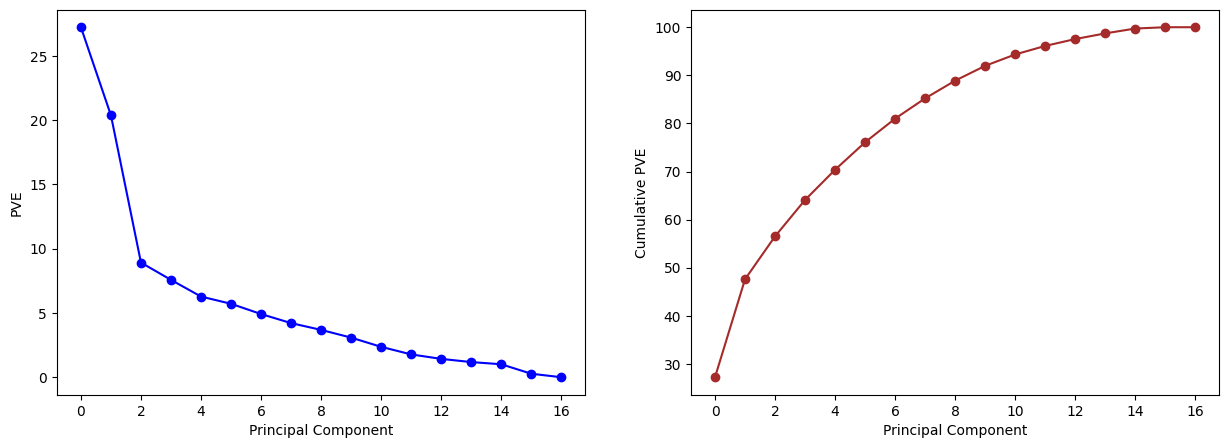

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(pve, marker='o', color='blue')
ax[0].set_ylabel('PVE')
ax[0].set_xlabel('Principal Component')
ax[1].plot(cumulative_pve, marker='o', color='brown')
ax[1].set_ylabel('Cumulative PVE')
ax[1].set_xlabel('Principal Component')
plt.show()

**BiPlot**

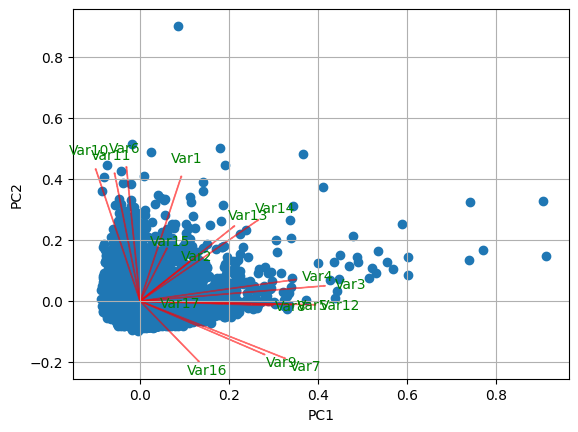

In [12]:
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

biplot(pca_model[:, 0:2], np.transpose(pca.components_))
plt.show()

**PCA with Reduced Dataset**

In [13]:
dataset_reduced_new = dataset_omitted.iloc[:, 1:8]
dataset_scaled_new = scaler.fit_transform(dataset_reduced_new)
pca_new = PCA()
pca_model_new = pca_new.fit_transform(dataset_scaled_new)
pve_new = 100 * pca_new.explained_variance_ratio_
cumulative_pve_new = np.cumsum(pve_new)

**Scree Plot of New Dataset(Reduced)**

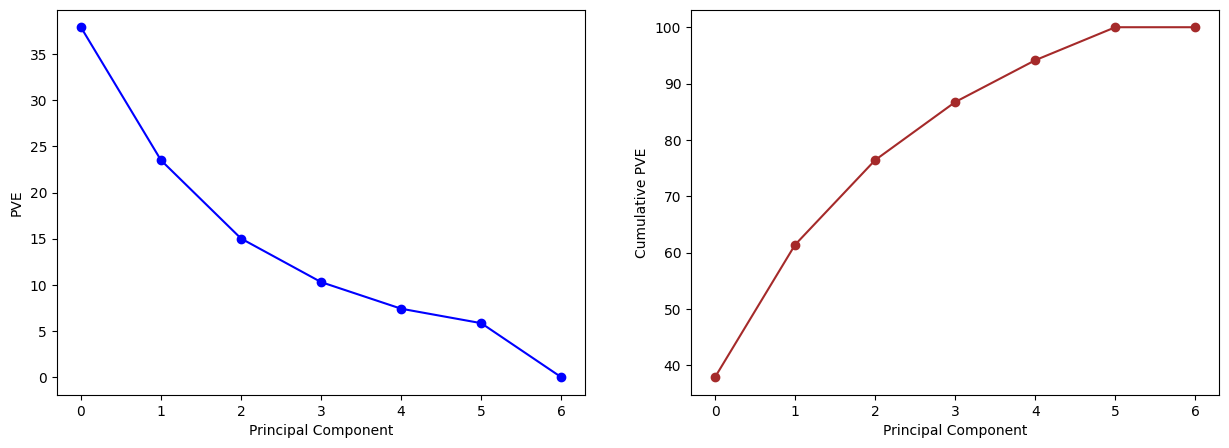

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(pve_new, marker='o', color='blue')
ax[0].set_ylabel('PVE')
ax[0].set_xlabel('Principal Component')
ax[1].plot(cumulative_pve_new, marker='o', color='brown')
ax[1].set_ylabel('Cumulative PVE')
ax[1].set_xlabel('Principal Component')
plt.show()

**Biplot of New PCA**

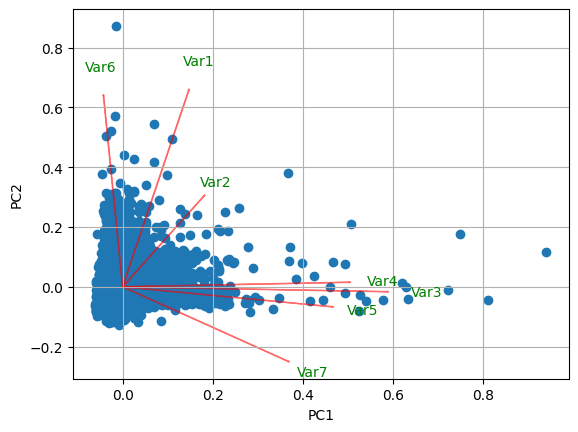

In [15]:
biplot(pca_model_new[:, 0:2], np.transpose(pca_new.components_))
plt.show()